In [1]:
# Local imports
from etl_pipeline.link_extractor import get_all_links
from etl_pipeline.content_extractor import get_content

# Other useful packages
import pandas as pd
import os
from datetime import datetime

### Link Extraction

In [2]:
links = get_all_links(company="OpenAI")

In [3]:
# Remove duplicates and prepare links to be extracted
links_df = pd.DataFrame(links)
links_df = links_df.drop_duplicates(subset=["se_link"])

In [4]:
# Could also remove based on duplicate titles. However, there is a genuine chance for the same title/headline by multiple news outlets. 
# Note, this can also be done later.
links_df["se_title"].duplicated().sum()

45

### Content Extraction

In [5]:
bodies = get_content(links_df["se_link"].tolist())

Getting news article info:   8%|▊         | 37/455 [00:04<00:46,  9.07it/s]encoding error : input conversion failed due to input error, bytes 0x21 0x00 0x00 0x00
encoding error : input conversion failed due to input error, bytes 0x44 0x00 0x00 0x00
I/O error : encoder error
Getting news article info:  31%|███▏      | 143/455 [00:14<00:37,  8.35it/s]encoding error : input conversion failed due to input error, bytes 0x21 0x00 0x00 0x00
encoding error : input conversion failed due to input error, bytes 0x44 0x00 0x00 0x00
I/O error : encoder error
Getting news article info:  32%|███▏      | 147/455 [00:14<00:26, 11.62it/s]encoding error : input conversion failed due to input error, bytes 0x21 0x00 0x00 0x00
encoding error : input conversion failed due to input error, bytes 0x44 0x00 0x00 0x00
I/O error : encoder error
Getting news article info:  34%|███▎      | 153/455 [00:15<00:40,  7.42it/s]/Users/johnbergmann/.pyenv/versions/3.8.16/envs/RB_NLP/lib/python3.8/site-packages/dateutil/parse

In [6]:
bodies_df = pd.DataFrame(bodies)

In [7]:
df = pd.merge(links_df, bodies_df, left_on='se_link', right_on='bs_link')

In [10]:
df.head()

,engine,se_link,se_title,se_description,se_source,n3k_link,n3k_title,n3k_body,n3k_author,n3k_published,bs_link,bs_title,bs_body
0,Yahoo,https://finance.yahoo.com/news/openai-now-lets...,OpenAI now lets you disable your ChatGPT histo...,ChatGPT now lets users disable their chat hist...,Business Insider via Yahoo Finance,https://finance.yahoo.com/news/openai-now-lets...,OpenAI now lets you disable your ChatGPT histo...,OpenAI now lets you disable your ChatGPT histo...,[Sarah Jackson],None,https://finance.yahoo.com/news/openai-now-lets...,Yahoo Finance,"Once you access ChatGPT in your browser, find ..."
1,Yahoo,https://www.computerworld.com/article/3694652/...,ChatGPT learns to forget: OpenAI implements da...,"OpenAI, the Microsoft-backed firm behind the g...",Computerworld,https://www.computerworld.com/article/3694652/...,ChatGPT learns to forget: OpenAI implements da...,"OpenAI, the Microsoft-backed firm behind the g...",[Jon Gold],None,https://www.computerworld.com/article/3694652/...,ChatGPT learns to forget: OpenAI implements da...,"OpenAI, the Microsoft-backed firm behind the g..."
2,Yahoo,https://www.foxnews.com/tech/openai-rolls-out-...,OpenAI rolls out new ChatGPT features includin...,Artificial intelligence leader OpenAI has intr...,Fox News,https://www.foxnews.com/tech/openai-rolls-out-...,OpenAI rolls out new ChatGPT features includin...,Artificial intelligence leader OpenAI has intr...,[Julia Musto],None,https://www.foxnews.com/tech/openai-rolls-out-...,OpenAI rolls out new ChatGPT features includin...,Artificial intelligence leader OpenAI has intr...
3,Yahoo,https://news.yahoo.com/best-free-ai-art-genera...,"The Best Free AI Art Generators, Ranked",You now can’t go anywhere without finding some...,Gizmodo via Yahoo News,https://news.yahoo.com/best-free-ai-art-genera...,"The Best Free AI Art Generators, Ranked",An image of a dog with swirling lines in an oi...,[Kyle Barr],None,https://news.yahoo.com/best-free-ai-art-genera...,Yahoo News,"Sometimes, I prefer my dog to look a little bi..."
4,Yahoo,https://finance.yahoo.com/news/openai-says-cha...,OpenAI says ChatGPT feature letting users disa...,ChatGPT users can decide whether to enable or ...,Fox Business via Yahoo Finance,https://finance.yahoo.com/news/openai-says-cha...,OpenAI says ChatGPT feature letting users disa...,ChatGPT users can now decide whether to enable...,[Aislinn Murphy],None,https://finance.yahoo.com/news/openai-says-cha...,Yahoo Finance,ChatGPT users can now decide whether to enable...


In [35]:
# Save data for later use
df.to_csv("data/OpenAI_26_04_2023.csv", index=False)

### Preprocessing

In [37]:
# Uncomment to read already extracted data
# df = pd.read_csv("data/OpenAI_26_04_2023.csv")
# df.head(3)

In [12]:
import nltk
import string

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/johnbergmann/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/johnbergmann/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/johnbergmann/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/johnbergmann/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/johnbergmann/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |     /U

True

In [13]:
tokenizer = RegexpTokenizer(r'\w+')
stemmer = PorterStemmer()

In [17]:
def clean_text(t):
    
    # remove numbers
    t = "".join([i for i in t if not i.isdigit()])

    # remove extra whitespaces and new lines
    t = t.replace("\n", "").strip()

    # remove punctuation 
    t = "".join ([c for c in t if c not in string.punctuation])

    # tokenization
    t = tokenizer.tokenize(t.lower())

    # remove stop words
    t = [word for word in t if word not in stopwords.words("english")]

    # stemming
    t = [stemmer.stem(i) for i in t]

    return " ".join(t)

In [31]:
data = df.copy()

In [32]:
data.columns

Index(['engine', 'se_link', 'se_title', 'se_description', 'se_source',
       'n3k_link', 'n3k_title', 'n3k_body', 'n3k_author', 'n3k_published',
       'bs_link', 'bs_title', 'bs_body'],
      dtype='object')

In [33]:
data["se_title"] = data["se_title"].apply(clean_text)
data["se_description"] = data["se_description"].apply(clean_text)
data["n3k_title"] = data["n3k_title"].apply(clean_text)
data["n3k_body"] = data["n3k_body"].apply(clean_text)
data["bs_title"] = data["bs_title"].apply(clean_text)
data["bs_body"] = data["bs_body"].apply(clean_text)
data["se_source"] = data["se_source"].apply(lambda x: x.strip())

### Huggingface Sentiment Analysis
- Pretrained neural net
- 5 is the best (positive)
- 1 is the lowest (negative)

In [69]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
import matplotlib.pyplot as plt

In [40]:
data.head(3)

,engine,se_link,se_title,se_description,se_source,n3k_link,n3k_title,n3k_body,n3k_author,n3k_published,bs_link,bs_title,bs_body
0,Yahoo,https://finance.yahoo.com/news/openai-now-lets...,openai let disabl chatgpt histori convers aren...,chatgpt let user disabl chat histori convers w...,Business Insider via Yahoo Finance,https://finance.yahoo.com/news/openai-now-lets...,openai let disabl chatgpt histori convers aren...,openai let disabl chatgpt histori convers aren...,[Sarah Jackson],None,https://finance.yahoo.com/news/openai-now-lets...,yahoo financ,access chatgpt browser find three dot bottom l...
1,Yahoo,https://www.computerworld.com/article/3694652/...,chatgpt learn forget openai implement data pri...,openai microsoftback firm behind groundbreak c...,Computerworld,https://www.computerworld.com/article/3694652/...,chatgpt learn forget openai implement data pri...,openai microsoftback firm behind groundbreak c...,[Jon Gold],None,https://www.computerworld.com/article/3694652/...,chatgpt learn forget openai implement data pri...,openai microsoftback firm behind groundbreak c...
2,Yahoo,https://www.foxnews.com/tech/openai-rolls-out-...,openai roll new chatgpt featur includ abil go ...,artifici intellig leader openai introduc abil ...,Fox News,https://www.foxnews.com/tech/openai-rolls-out-...,openai roll new chatgpt featur includ abil go ...,artifici intellig leader openai introduc abil ...,[Julia Musto],None,https://www.foxnews.com/tech/openai-rolls-out-...,openai roll new chatgpt featur includ abil go ...,artifici intellig leader openai introduc abil ...


In [41]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [42]:
def sentiment_score(news_object):
    tokens = tokenizer.encode(news_object, return_tensors="pt")
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [43]:
# Data pipeline limited to 512 tokens (huggingface since free thing or model thing?)
data["se_title_sentiment"] = data["se_title"].apply(lambda x: sentiment_score(x[:512]))
data["se_description_sentiment"] = data["se_description"].apply(lambda x: sentiment_score(x[:512]))
data["n3k_title_sentiment"] = data["n3k_title"].apply(lambda x: sentiment_score(x[:512]))
data["n3k_body_sentiment"] = data["n3k_body"].apply(lambda x: sentiment_score(x[:512]))
data["bs_title_sentiment"] = data["bs_title"].apply(lambda x: sentiment_score(x[:512]))
data["bs_body_sentiment"] = data["bs_body"].apply(lambda x: sentiment_score(x[:512]))

In [82]:
n3k_body_avg_sentiment_by_source = (
    data[["se_source", "n3k_body_sentiment"]]
    .groupby("se_source", as_index=False)
    .mean()
    .sort_values(by="n3k_body_sentiment")
    .reset_index(drop=True)
)


In [108]:
n3k_body_avg_sentiment_by_source

,se_source,n3k_body_sentiment
0,247wallst.com,1.0
1,PYMNTS.com,1.0
2,Philippine Daily Inquirer,1.0
3,Reuters via Yahoo Finance,1.0
4,SearchSecurity.com,1.0
...,...,...
185,NVIDIA Blog,5.0
186,Digital Health,5.0
187,Barrons.com,5.0
188,PR Newswire,5.0


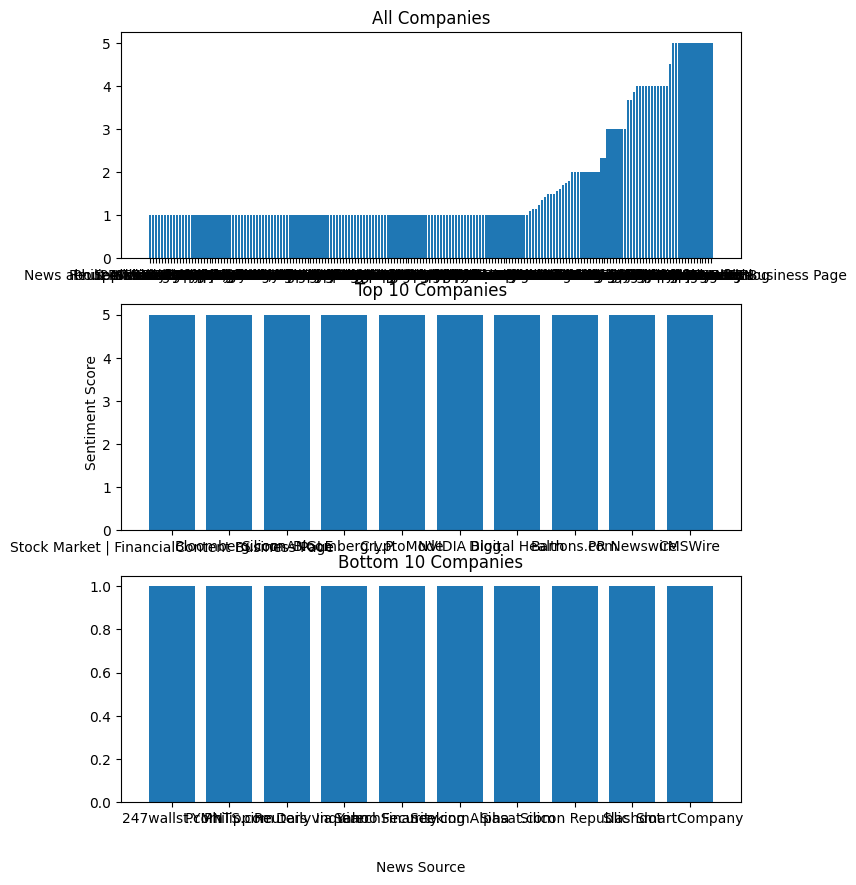

In [106]:
# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8, 10), sharex=False)

# Plot all the data in the first subplot
ax1.bar(n3k_body_avg_sentiment_by_source["se_source"], n3k_body_avg_sentiment_by_source["n3k_body_sentiment"])
ax1.set_title("All Sources")

# Plot the highest 10 sentiment sources in the second subplot
ax2.bar(n3k_body_avg_sentiment_by_source["se_source"].iloc[-10:], n3k_body_avg_sentiment_by_source["n3k_body_sentiment"].iloc[-10:])
ax2.set_title("10 Highest Sentiment")

# Plot the lowest 10 sentiment sources in the third subplot
ax3.bar(n3k_body_avg_sentiment_by_source["se_source"].iloc[:10], n3k_body_avg_sentiment_by_source["n3k_body_sentiment"].iloc[:10])
ax3.set_title("Lowest 10 Sentiment News")

# Add labels and a common y-axis label to the chart
fig.text(0.5, 0.04, "News Source", ha="center")
fig.text(0.08, 0.5, "Sentiment Score", va="center", rotation="vertical")

# Display the chart
plt.show()

In [147]:
positive = n3k_body_avg_sentiment_by_source.loc[n3k_body_avg_sentiment_by_source["n3k_body_sentiment"] > 3.5]
neutral = n3k_body_avg_sentiment_by_source.loc[(n3k_body_avg_sentiment_by_source["n3k_body_sentiment"] >= 2) & (n3k_body_avg_sentiment_by_source["n3k_body_sentiment"] <= 3)]
negative = n3k_body_avg_sentiment_by_source.loc[n3k_body_avg_sentiment_by_source["n3k_body_sentiment"] < 2.5]

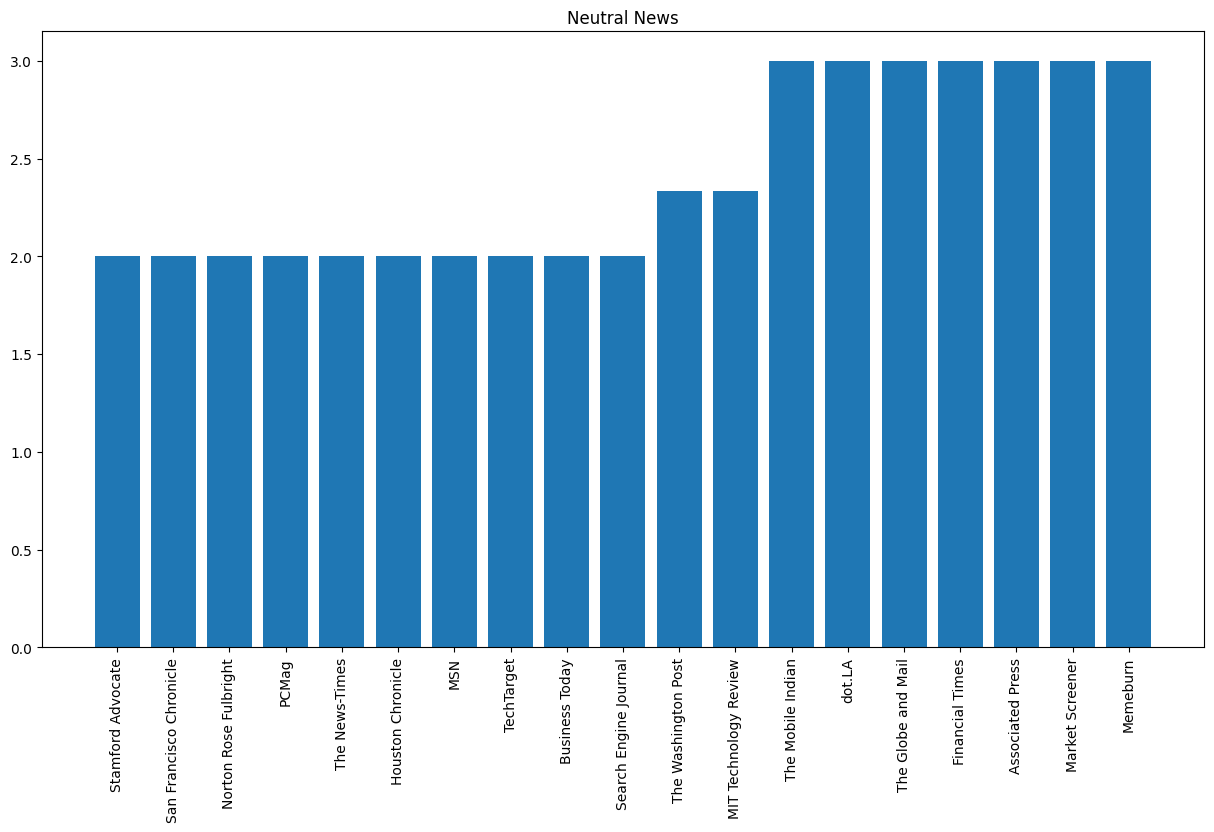

In [148]:
fig, axis = plt.subplots(figsize=(15,8))

axis.set_title("Neutral News")

plt.bar(neutral["se_source"], neutral["n3k_body_sentiment"])
plt.xticks(rotation=90);

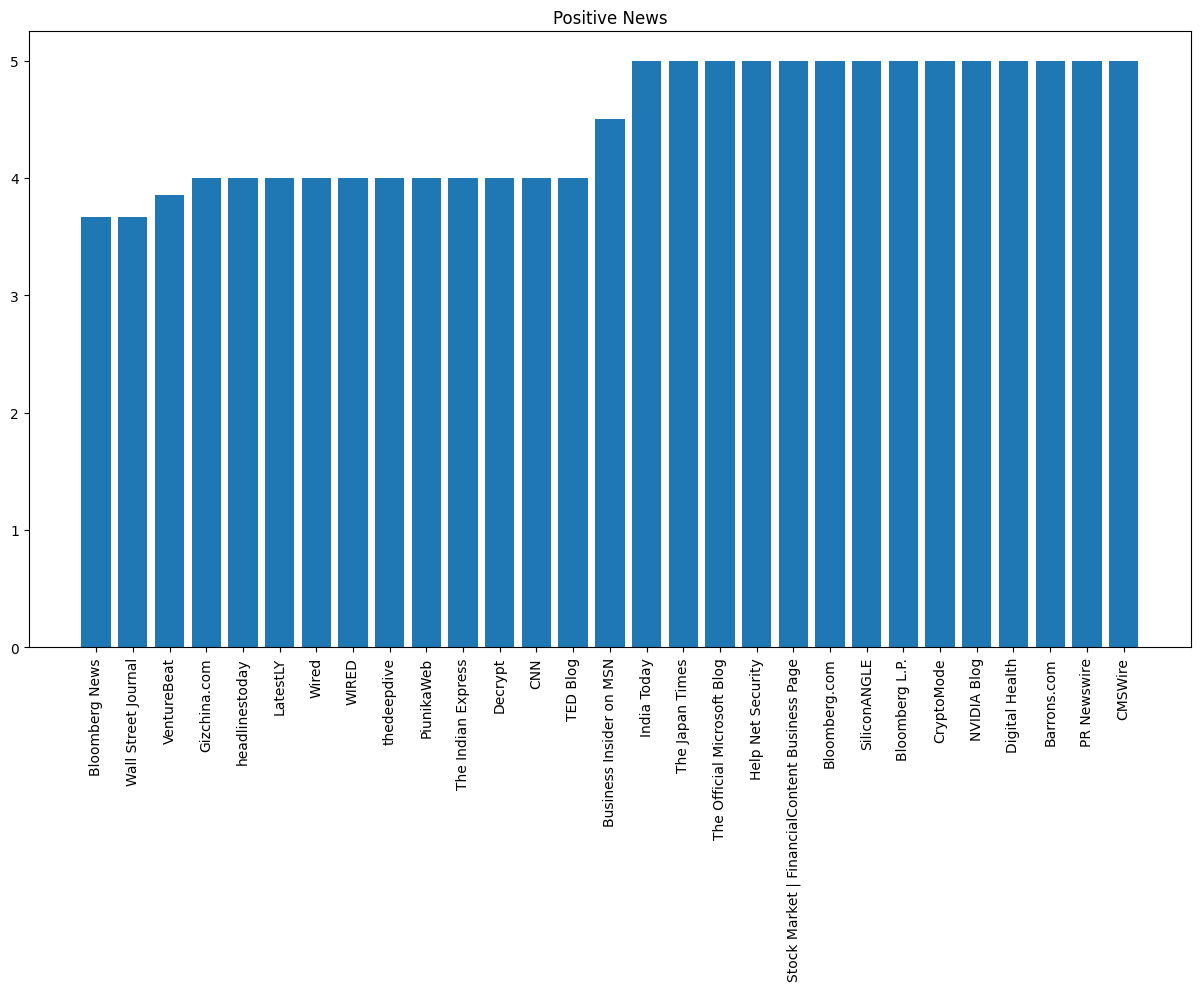

In [150]:
fig, axis = plt.subplots(figsize=(15,8))

axis.set_title("Positive News")

plt.bar(positive["se_source"], positive["n3k_body_sentiment"])
plt.xticks(rotation=90);

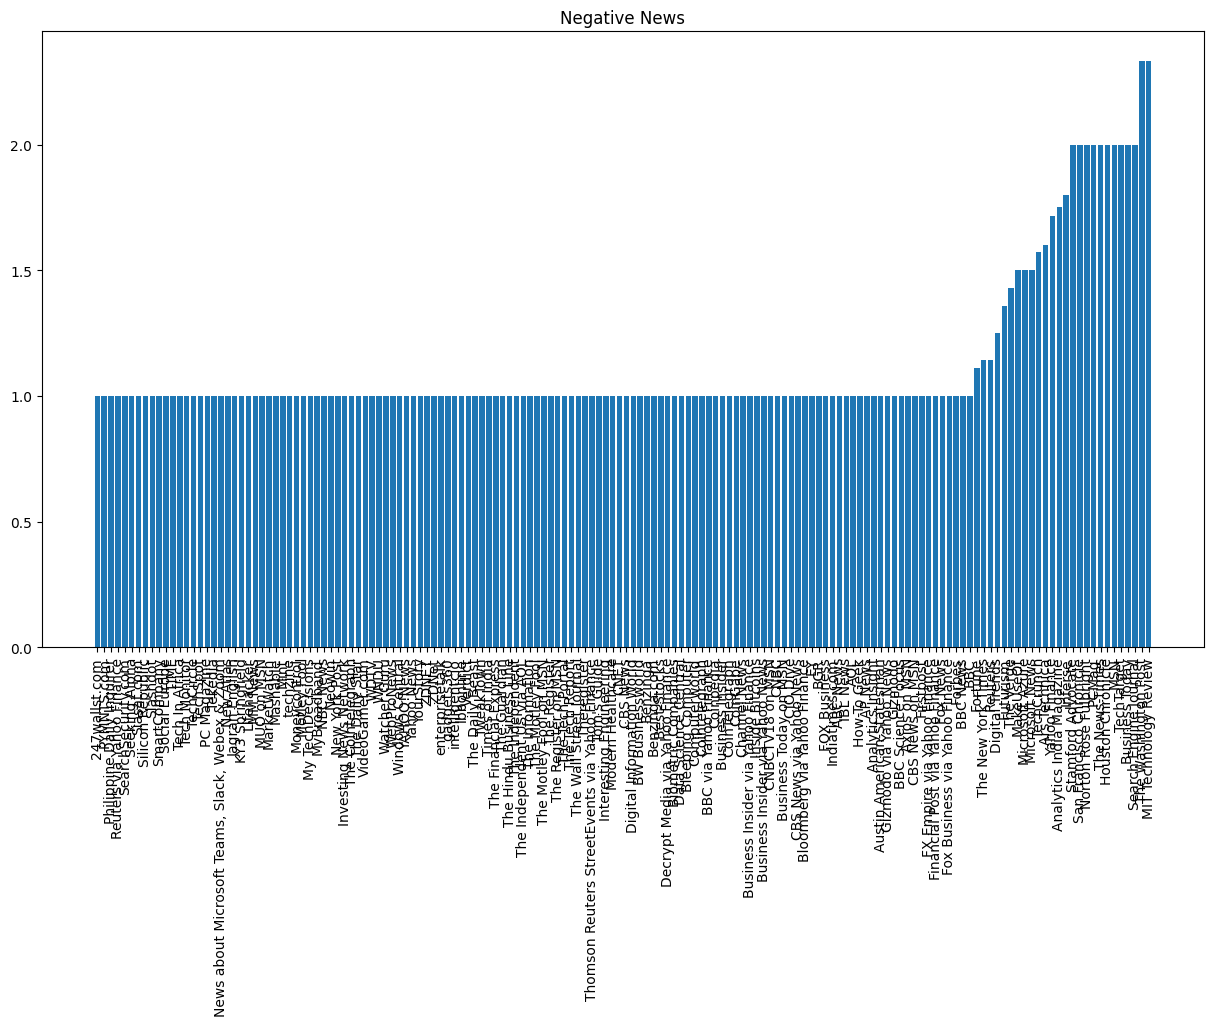

In [151]:
fig, axis = plt.subplots(figsize=(15,8))

axis.set_title("Negative News")

plt.bar(negative["se_source"], negative["n3k_body_sentiment"])
plt.xticks(rotation=90);